# DHRI 2022 Workshop: Tidy Text Mining in R for Digital Humanities

This is a hands-on workshop part of the Digital Humanities Research Institute 2022 focusing on textual analysis methods and applications for Digital Humanities using the programming language R and the [tidyverse](https://www.tidyverse.org). The workshop will be split into 4 sections with a XXXX minute break in-between the third and fourth section. The sections get 
incrementally more advanced, building on concepts and methods from the previous sections.

Instructor:

- Jerry Bonnell, <a href="mailto:j.bonnell@miami.edu">j.bonnell@miami.edu</a>, University of Miami, Department of Computer Science


### Overview

Here is an outline of what you will learn in this workshop: 

#### 1. Retrieving text with the `gutenbergr` package (20 mins)

This unit will give a brief introduction to retrieving texts from the Project Gutenberg
repository and how to load them into an R environment. Concepts needed to understand how 
textual data is represented in R will also be explained. We will choose select works
from Herman Melville's oeuvre as an example corpus to play with and participants will
have an opportunity to download their own texts as well.  

- 0:00 - 0:05 Set up and introduction to tidyverse and workshop packages
- 0:05 - 0:15 The `gutenbergr` package and how to query and download text as a tibble
- 0:15 - 0:20 __[Exercise]__ Downloading your own texts from Project Gutenberg


#### 2. Understanding the "tidy text" format (40 mins)

This unit will motivate and introduce the "tidy text" format as a 
principled way for managing and transforming textual data effectively. It will
also show how tidy text principles can be applied to tidying an example corpus 
downloaded from Project Gutenberg. 

- 0:00 - 0:05 Why bother making text "tidy"? 
- 0:05 - 0:10 Tokens and tokenization: the basic meaningful unit in text analysis
- 0:10 - 0:15 __[Exercise]__ Accessing tokens in an example sentence
- 0:15 - 0:20 Example: Transforming *Moby Dick* to tidy text
- 0:20 - 0:30 Stopwords
- 0:30 - 0:35 Transformation to and from non-tidy forms
- 0:35 - 0:40 __[Exercise]__ From tidy text to document-feature matrix


#### 3. Frequency analysis with "tidy text" principles (40 mins)

This unit will focus on how to accomplish a frequency analysis task using 
tidy text principles, with the help of plots and visualizations that are 
commonly used when analyzing the data this way. 

- 0:00 - 0:10 Exploring a "tidy pipeline" for a corpus of Melville prose
- 0:10 - 0:20 Visualizing popular words with `ggplot2`
- 0:20 - 0:25 __[Exercise]__ Tweaking a visualization  
- 0:25 - 0:40 Just how influential was *Moby Dick*’s vocabulary?

#### 4. Sentiment analysis with "tidy text" principles (50 mins)

This unit turns to a more advanced text mining task of sentiment
analysis. We will learn how to approach sentiment using tidy 
text and explore this through the narratives of Melville's works. 

- 0:00 - 0:10 The sentiments datasets
- 0:10 - 0:20 Sentiment analysis by merging tables 
- 0:20 - 0:30 Top positive and negative words 
- 0:30 - 0:40 pos/neg word cloud visualization (?)
- 0:40 - 0:50 Limitations (target language, negations, ...)

## 0. Setting up 

Before we get started, let's go ahead and set up our notebook.

We will start by importing a few important R packages that we will be using throughout the workshop.

In [2]:
options(repr.matrix.max.cols=20, repr.matrix.max.rows=15)
options(repr.plot.width = 10, repr.plot.height = 6, repr.plot.res = 160)

library(tidyverse)
library(tidytext)
library(gutenbergr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



#### What are these libraries?


<table><tr>
<td> <img src="https://ds4world.cs.miami.edu/images/hex-tidyverse.png" style="width: 170px;"/> </td>
<td> <img src="https://raw.githubusercontent.com/juliasilge/tidytext/master/man/figures/tidytext.png" style="width: 170px;"/> </td>
<td> <img src="https://docs.ropensci.org/gutenbergr/hexlogo.png" style="width: 170px;"/></td>
</tr></table>


1. `tidyverse`: An opinionated collection of R packages designed for data science, each having to do with data processing, transformation, and visualization. All packages share a core underlying design philosophy. The main packages we will see from here are `tibble`, for tabular representation of data, and `ggplot2`, for an easy-to-understand and consistent methodology for doing data visualization. 
2. `tidytext`: This package brings "tidy principles" to text so that text mining tasks are easier to do, more effective, and consistent with other tools already in wide use, e.g.,  members of the `tidyverse` like `dplyr`, `tibble`, and `ggplot2`.  
3. `gutenbergr`: A package that provides a useful querying tool for searching and downloading public domain works from the [Project Gutenberg](http://www.gutenberg.org/) collection.

We will be working with a few sample texts using the `gutenbergr` package. 

## 1. Text retrieval with `gutenbergr`

For the first part of this session we will use a corpus of Herman Melville’s prose as a data source for exploring tidy text principles and conducting text mining tasks. We will collect four texts from the Project Gutenberg repository for this part of the workshop: *Moby Dick*, *Bartleby, the Scrivener: A Story of Wall-Street*, *White Jacket*, and *Typee: A Romance of the South Seas*.

The `gutenbergr` package makes text querying and retrieval fairly straightforward. For instance, we can look up all texts available in the repository that have been authored by Melville. 

In [3]:
gutenberg_works(author == "Melville, Herman")

gutenberg_id,title,author,gutenberg_author_id,language,gutenberg_bookshelf,rights,has_text
<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<lgl>
15,Moby Dick,"Melville, Herman",9,en,Best Books Ever Listings/Adventure,Public domain in the USA.,TRUE
1900,Typee: A Romance of the South Seas,"Melville, Herman",9,en,NA,Public domain in the USA.,TRUE
2489,"Moby Dick; Or, The Whale","Melville, Herman",9,en,Best Books Ever Listings,Public domain in the USA.,TRUE
2694,I and My Chimney,"Melville, Herman",9,en,NA,Public domain in the USA.,TRUE
4045,Omoo: Adventures in the South Seas,"Melville, Herman",9,en,NA,Public domain in the USA.,TRUE
8118,Redburn. His First Voyage Being the Sailor Boy Confessions and Reminiscences of the Son-Of-A-Gentleman in the Merchant Navy,"Melville, Herman",9,en,NA,Public domain in the USA.,TRUE
10712,"White Jacket; Or, The World on a Man-of-War","Melville, Herman",9,en,NA,Public domain in the USA.,TRUE
11231,"Bartleby, the Scrivener: A Story of Wall-Street","Melville, Herman",9,en,NA,Public domain in the USA.,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


The results are returned in a format known as a *tibble*, which gives a tabular representation of the data. Tibbles are a modern take on the R *data frame*, which you may already be familiar with. From this returned tibble, we can immediately identify the Gutenberg IDs (in the column `gutenberg_id`) corresponding to the desired texts we wish to download: `11231`, `15`, `10712`, and `1900`. 

We can actually retrieve all these texts at once using the `gutenberg_download()` function and specifying an array of these values (technically known as a *vector* in R):

In [4]:
gutenberg_ids <- c(11231, 15, 10712, 1900)
melville <- gutenberg_download(gutenberg_ids, mirror = "http://mirrors.xmission.com/gutenberg/")
melville

gutenberg_id,text
<int>,<chr>
15,Moby-Dick
15,
15,"or,"
15,
15,THE WHALE.
15,
15,by Herman Melville
15,
⋮,⋮


The results are returned in the form of a tibble with one row per each line of the text. We assign this tibble to the name `melville`, so that we may refer to it again later to view the contents of this table. 


__Exercise:__ Use the functions `gutenberg_works()` and `gutenberg_download()` to look up and retrieve a text you are interested in from Project Gutenberg. Unsure of an author or title to try? Check out [Project Gutenberg's top 100 works yesterday](https://www.gutenberg.org/browse/scores/top)!   

In [ ]:
# Your code goes here! 

Since ID numbers are cryptic to understand and it is not immediately clear that numbers like `15` actually refer to *Moby Dick*, let us recode each of the values according to their proper title. We will add a new column to this tibble `melville` with the corresponding titles.  

In [5]:
melville <- melville %>%
  mutate(title = recode(gutenberg_id, 
                               '15' = 'Moby Dick', 
                               '11231' = 'Bartleby, the Scrivener',
                               '10712' = 'White Jacket',
                               '1900' = 'Typee: A Romance of the South Seas'))
melville

gutenberg_id,text,title
<int>,<chr>,<chr>
15,Moby-Dick,Moby Dick
15,,Moby Dick
15,"or,",Moby Dick
15,,Moby Dick
15,THE WHALE.,Moby Dick
15,,Moby Dick
15,by Herman Melville,Moby Dick
15,,Moby Dick
⋮,⋮,⋮


## 2. In pursuit of "tidy text" 

A goal of this workshop is learning how to do textual analysis using "tidy data" principles. This means that a prerequisite to conducting any kind of textual analysis is to first preprocess, or *tidy*, the text. 

### 2.1 Why bother making text "tidy"? Why not just leave it as-is? 

Hadley Wickham, a distinguished data scientist and main contributor to the `tidyverse`, offers the following amendment to the famous Leo Tolstoy quote in his seminal work [Tidy Data](http://www.jstatsoft.org/v59/i10/paper): 

> "Happy families are all alike; every unhappy family is unhappy in its own way." –– Leo Tolstoy

> "Tidy datasets are all alike, but every messy dataset is messy in its own way." –– Hadley Wickham

Tidy data gives a consistent way for organizing data in R. It requires investing some upfront work, but bringing your data into "tidyness" (or, perhaps better said, the "tidyverse"?) means much less time munging or "wrangling" your data from one representation to another. This translates to more time on analysis.  

Put more simply, tidy data equals consistency:

<center>
<img src="https://raw.githubusercontent.com/allisonhorst/stats-illustrations/master/rstats-artwork/tidydata_3.jpg" style="width: 500px;"/>
</center>

__Image credits__: "Illustrations from the Openscapes blog Tidy Data for reproducibility, efficiency, and collaboration" by Julia Lowndes and Allison Horst. 

Tidy data principles do well when extended to *textual analysis* as they can make text mining tasks easier to accomplish. Treating text as a table of individual words allows us to manipulate, summarize, and visualize text characteristics.  


### 2.2 Tokens and tokenization: the basic meaningful unit in text analysis 

The basic meaningful unit in text analysis is the *token*. It is usually a word, but it can be more or less granular depending on the context, e.g., "sentence-like" units or vowel units. For the purposes of this workshop, the token will always represent the word unit.

*Tokenization* is the process of splitting text into tokens. For instance, here are a few sentences from *Moby Dick*: 

In [7]:
some_moby_sentences <- c(
  "Call me Ishmael.", 
  "Some years ago--never mind how long precisely--having little or no money in my purse,",
  "and nothing particular to interest me on shore,",
  "I thought I would sail about a little and see the watery part of the world.")

We are fortunate that tokens in standard written English are delimited by white space `" "`. So tokenization of these sentences can be easy to accomplish using a string manipulation function like `str_split()` from the `stringr` package.

In [8]:
tokenized <- some_moby_sentences %>%
  str_split(" ")
tokenized

[[1]]
[1] "Call"     "me"       "Ishmael."

[[2]]
 [1] "Some"              "years"             "ago--never"       
 [4] "mind"              "how"               "long"             
 [7] "precisely--having" "little"            "or"               
[10] "no"                "money"             "in"               
[13] "my"                "purse,"           

[[3]]
[1] "and"        "nothing"    "particular" "to"         "interest"  
[6] "me"         "on"         "shore,"    

[[4]]
 [1] "I"       "thought" "I"       "would"   "sail"    "about"   "a"      
 [8] "little"  "and"     "see"     "the"     "watery"  "part"    "of"     
[15] "the"     "world."

By the way, the `%>%` operator used above is known as the "pipe" operator. It can be read as saying "and then...". Thus, the above code could be read as: "take the string in the name `some_moby_sentences` *and then* split it by the white space character." Formally, `x %>% f(y)` is equivalent to saying `f(x, y)`. 

Each sentence in `tokenized` has been split into tokens, and we can access any of them using list and vector R notation.

In [9]:
tokenized[[1]][3]

[1] "Ishmael."

__Exercise:__ Can you figure out how we could reference the token "money" in the second sentence? 

In [10]:
# Your code goes here!

### 2.3 Tidying *Moby Dick*

To explore these tidy principles in greater detail, let us return to our corpus of Melville prose. For now, we will concentrate our efforts on just a single work: *Moby Dick*. So we will collect all rows from `melville` that correspond to the Gutenberg ID associated with this title, `15`. 

In [6]:
moby_dick <- melville %>%
  filter(title == "Moby Dick")

The name `moby_dick` refers to the table containing the text for *Moby Dick*. To better understand this table, let us examine the text from line numbers 500 to 515.  

In [8]:
moby_dick %>%
  slice(500:515)

gutenberg_id,text,title
<int>,<chr>,<chr>
15,,Moby Dick
15,"“She came to bespeak a monument for her first love, who had been killed",Moby Dick
15,"by a whale in the Pacific ocean, no less than forty years ago.”",Moby Dick
15,—_Ibid_.,Moby Dick
15,,Moby Dick
15,"“No, Sir, ’tis a Right Whale,” answered Tom; “I saw his spout; he threw",Moby Dick
15,up a pair of as pretty rainbows as a Christian would wish to look at.,Moby Dick
15,"He’s a raal oil-butt, that fellow!” —_Cooper’s Pilot_.",Moby Dick
⋮,⋮,⋮


Text that is tidy is a *table with one token per row*. Assuming that the text is given to us in tabular form (like `moby_dick`), we can break text into tokens and transform it to a tidy structure in one go using the function `unnest_tokens()` from the `tidytext` package.

In [9]:
tidy_moby_dick <- moby_dick %>%
  unnest_tokens(word, text)
tidy_moby_dick

gutenberg_id,title,word
<int>,<chr>,<chr>
15,Moby Dick,moby
15,Moby Dick,dick
15,Moby Dick,or
15,Moby Dick,the
15,Moby Dick,whale
15,Moby Dick,by
15,Moby Dick,herman
15,Moby Dick,melville
⋮,⋮,⋮


How about we try applying the same `slice()` function, but now on `tidy_moby_dick` instead?


In [10]:
tidy_moby_dick %>%
  slice(500:520)

gutenberg_id,title,word
<int>,<chr>,<chr>
15,Moby Dick,ciii
15,Moby Dick,measurement
15,Moby Dick,of
15,Moby Dick,the
15,Moby Dick,whale’s
15,Moby Dick,skeleton
15,Moby Dick,chapter
15,Moby Dick,civ
⋮,⋮,⋮


Note how each row of this table contains just one token, unlike `moby_dick` which gave a row for each line. When text is in this form, we say it follows a *one-token-per-row structure* and, therefore, is tidy.

### 2.4 Stopwords 

With our text ready in tidy form, we can start answering some basic questions about the text. For example: *what are the most popular words in Moby Dick?* 

We can answer this using the function `count()` from the tibble manipulation package `dplyr`:


In [11]:
tidy_moby_dick %>%
  count(word, sort = TRUE)

word,n
<chr>,<int>
the,14521
of,6611
and,6445
a,4717
to,4628
in,4175
that,2974
his,2529
⋮,⋮


The result is quite disappointing! Top-ranking words that appear are so obvious and do not clue us as to the characteristics of the language used in *Moby Dick*. It obstructs from any kind of analysis being made.

These common words (e.g., "this", "his", "that", "in") that appear in almost every written English sentence are known as stopwords. It is a typical tidying step in text analysis studies to remove said stopwords before marching forward with the analysis.

The tibble `stop_words` is a tibble provided by `tidytext` that contains a list of English stopwords.


In [12]:
stop_words

word,lexicon
<chr>,<chr>
a,SMART
a's,SMART
able,SMART
about,SMART
above,SMART
according,SMART
accordingly,SMART
across,SMART
⋮,⋮


Using the function `anti_join()`, we can filter out any rows from `tidy_moby_dick` that match with a stopword in the tibble `stop_words`.

In [13]:
tidy_moby_dick_stopworded <- tidy_moby_dick %>%
  anti_join(stop_words)
tidy_moby_dick_stopworded

Joining, by = "word"



gutenberg_id,title,word
<int>,<chr>,<chr>
15,Moby Dick,moby
15,Moby Dick,dick
15,Moby Dick,whale
15,Moby Dick,herman
15,Moby Dick,melville
15,Moby Dick,contents
15,Moby Dick,etymology
15,Moby Dick,extracts
⋮,⋮,⋮


Observe how the total number of rows in this tibble has decreased dramatically when compared with `tidy_moby_dick`. Let us redo the most popular word list again.

In [14]:
tidy_moby_dick_stopworded %>%
  count(word, sort = TRUE)

word,n
<chr>,<int>
whale,1105
sea,453
ship,440
ahab,438
ye,429
head,347
time,334
chapter,308
⋮,⋮


Much better! We can visualize the list using a bar plot in `ggplot2`.

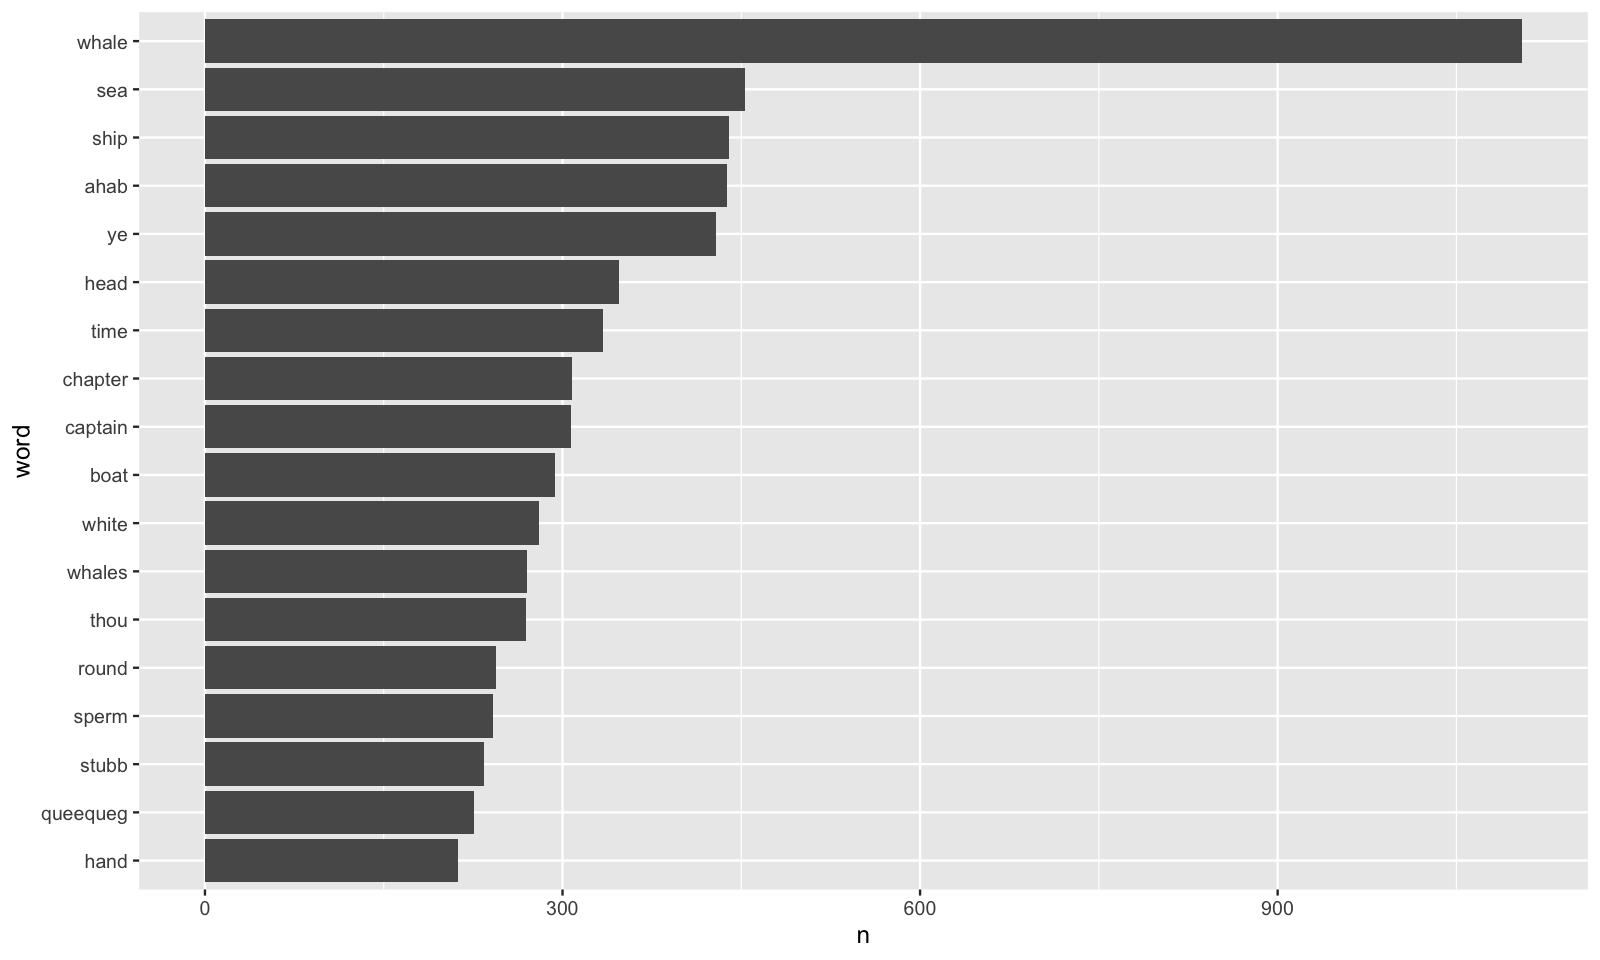

In [15]:
tidy_moby_dick_stopworded %>%
  count(word, sort = TRUE) %>%
  filter(n > 200) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot() +
  geom_bar(aes(x=n, y=word), stat="identity")

From this visualization, we can clearly see that the story talks a lot about whales, the sea, ships, 
and a character named "Ahab". Some participants may point out that "ye" should also be considered a stopword, which raises an important point about standard stopword lists: they do not do well with lexical variants. For this, a custom list should be specified or appended to the standard list.

Our visualization is also a first course in how tidy text plays nicely with members of the `tidyverse` like `ggplot2`. 

### 2.5 Transformation to and from non-tidy forms 

Before we turn to our first full-fledged text mining application, let us touch briefly on one more practical note about organizing your corpus as tidy text. 

Tidy text is useful in that it plays well with core tidyverse members like `ggplot2`, as we just saw earlier. However, the principles of tidy text should not be taken as license for labeling non-tidy text forms as without purpose. In fact, important text analysis modeling techniques like *topic modeling* will only accept text that is in a non-tidy form. The real magic of tidy text, then, lies not in its elegance and easy-to-digest format, but in its ability to move fluidly between tidy and non-tidy forms. 


As an example, here is how we can convert tidy text to a format known as a *document term matrix* which is how topic modeling likes its input. Don’t worry if all that seems like nonsense jargon – the part you should care about is that we can convert tidy text to a document term matrix with __just one line of code__!

In [16]:
tidy_moby_dick_stopworded %>%
  count(gutenberg_id, word) %>%
  cast_dtm(gutenberg_id, word, n)

<<DocumentTermMatrix (documents: 1, terms: 17260)>>
Non-/sparse entries: 17260/0
Sparsity           : 0%
Maximal term length: 20
Weighting          : term frequency (tf)

__Exercise:__ Another useful non-tidy text format is a *document-feature matrix*. In this form, the table is structured as one token per column, where the value given in the column is the frequency of the token. We can convert tidy text to a document-feature matrix using the function `cast_dfm()`. Can you complete the following code to convert the tidy tibble `moby_dick_words_with_counts` to a document-feature matrix? 

Try using the `%>%` operator!

In [31]:
# Your code here!

## 3. Frequency analysis

We are now ready to apply the tidy text principles we have learned to carry out a simple first study 
in text mining: *frequency analysis* (or, *word count analysis*). While looking at word counts is a simple idea, it is a helpful first step in exploring text data and can inform next steps in research.

We are also ready to return to our corpus of Melville prose we put together earlier in the workshop,
available in the name `melville`. 

### 3.1 Tidying `melville`

As we just saw, before any textual analysis can be had, the corpus must be brought into tidy text. 
We can chain together the steps before by connecting them using the `%>%` operator. That is, we will:

* Convert the text to a *one-token-per-row* structure, 
* Filter stopwords from the text using the standard `stop_words` list. 
* __Also,__ enforce that all tokens that appear are strictly alphabetical. 

The last step may or may not be helpful to include depending on the study. Because we are approaching these texts exclusively from the stance of distant reading, numerical tokens carry little inherent meaning. Technically, we would call said tokens *noisy* because they distort the possibility for analysis.

Now, the code: 


In [17]:
tidy_melville <- melville %>%
  unnest_tokens(word, text) %>%
  anti_join(stop_words) %>%
  mutate(word = str_extract(word, "[a-z]+"))
tidy_melville

Joining, by = "word"



gutenberg_id,title,word
<int>,<chr>,<chr>
15,Moby Dick,moby
15,Moby Dick,dick
15,Moby Dick,whale
15,Moby Dick,herman
15,Moby Dick,melville
15,Moby Dick,contents
15,Moby Dick,etymology
15,Moby Dick,extracts
⋮,⋮,⋮


As a quick check, let us perform a "word count" for each of the texts. 


In [18]:
tidy_melville %>%
  group_by(title) %>%
  count(word, sort = TRUE) %>%
  summarize(num_words = sum(n)) %>%
  arrange(desc(num_words))

title,num_words
<chr>,<int>
Moby Dick,86233
White Jacket,56449
Typee: A Romance of the South Seas,43026
"Bartleby, the Scrivener",4999


*Moby Dick* is a mammoth of a book (178 pages!) so it makes sense that it would rank highest in the 
list in terms of word count.

### 3.2 Visualizing popular words

Let us find the most popular words in each of the titles.

In [19]:
tidy_melville <- tidy_melville %>%
  group_by(title) %>%
  count(word, sort = TRUE) %>%
  ungroup()
tidy_melville

title,word,n
<chr>,<chr>,<int>
Moby Dick,whale,1243
Moby Dick,ahab,520
Moby Dick,ship,520
White Jacket,war,481
Moby Dick,sea,454
Moby Dick,ye,439
White Jacket,captain,413
Moby Dick,head,348
⋮,⋮,⋮


This lends itself well to a bar geom in `ggplot`. We will select out around the 10 most popular, which correspond to words that occur over 300 times.

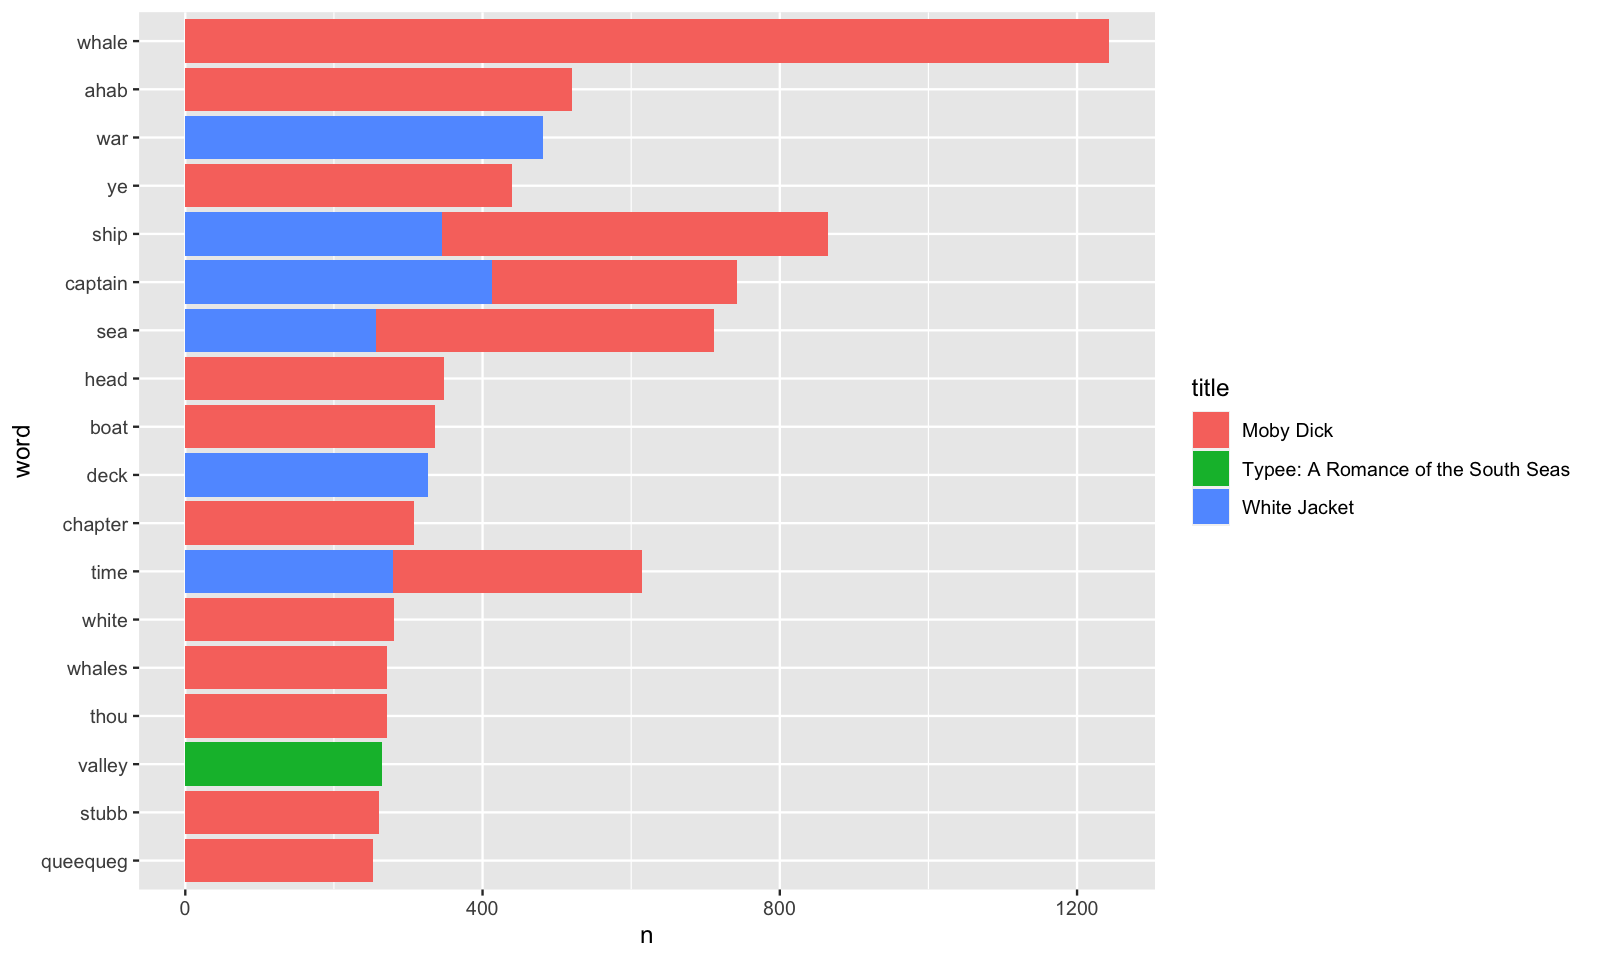

In [20]:
tidy_melville %>%
  filter(n > 250) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot() +
  geom_bar(aes(x=n, y=word, fill=title), stat="identity")

Something is odd about this plot. These top words are mostly coming from *Moby Dick*! As we just saw,
*Moby Dick* is the largest title in our collection so any of its popular words would dominate the overall popular list of words in terms of word count.

Instead of looking at word counts, a better approach is to look at *word proportions*. Even though the word "whale" may have over 1200 occurrences, the proportion in which it appears may be much less when compared to other titles.

Let us add a new column containing these proportions in which a word occurs with respect to the total number of words in the corresponding text.


In [21]:
tidy_melville_with_proportion <- tidy_melville %>%
  group_by(title) %>%
  mutate(proportion = n / sum(n)) %>%
  ungroup()
tidy_melville_with_proportion

title,word,n,proportion
<chr>,<chr>,<int>,<dbl>
Moby Dick,whale,1243,0.014414435
Moby Dick,ahab,520,0.006030174
Moby Dick,ship,520,0.006030174
White Jacket,war,481,0.008520966
Moby Dick,sea,454,0.005264806
Moby Dick,ye,439,0.005090858
White Jacket,captain,413,0.007316339
Moby Dick,head,348,0.004035578
⋮,⋮,⋮,⋮


Let us redo the plot.

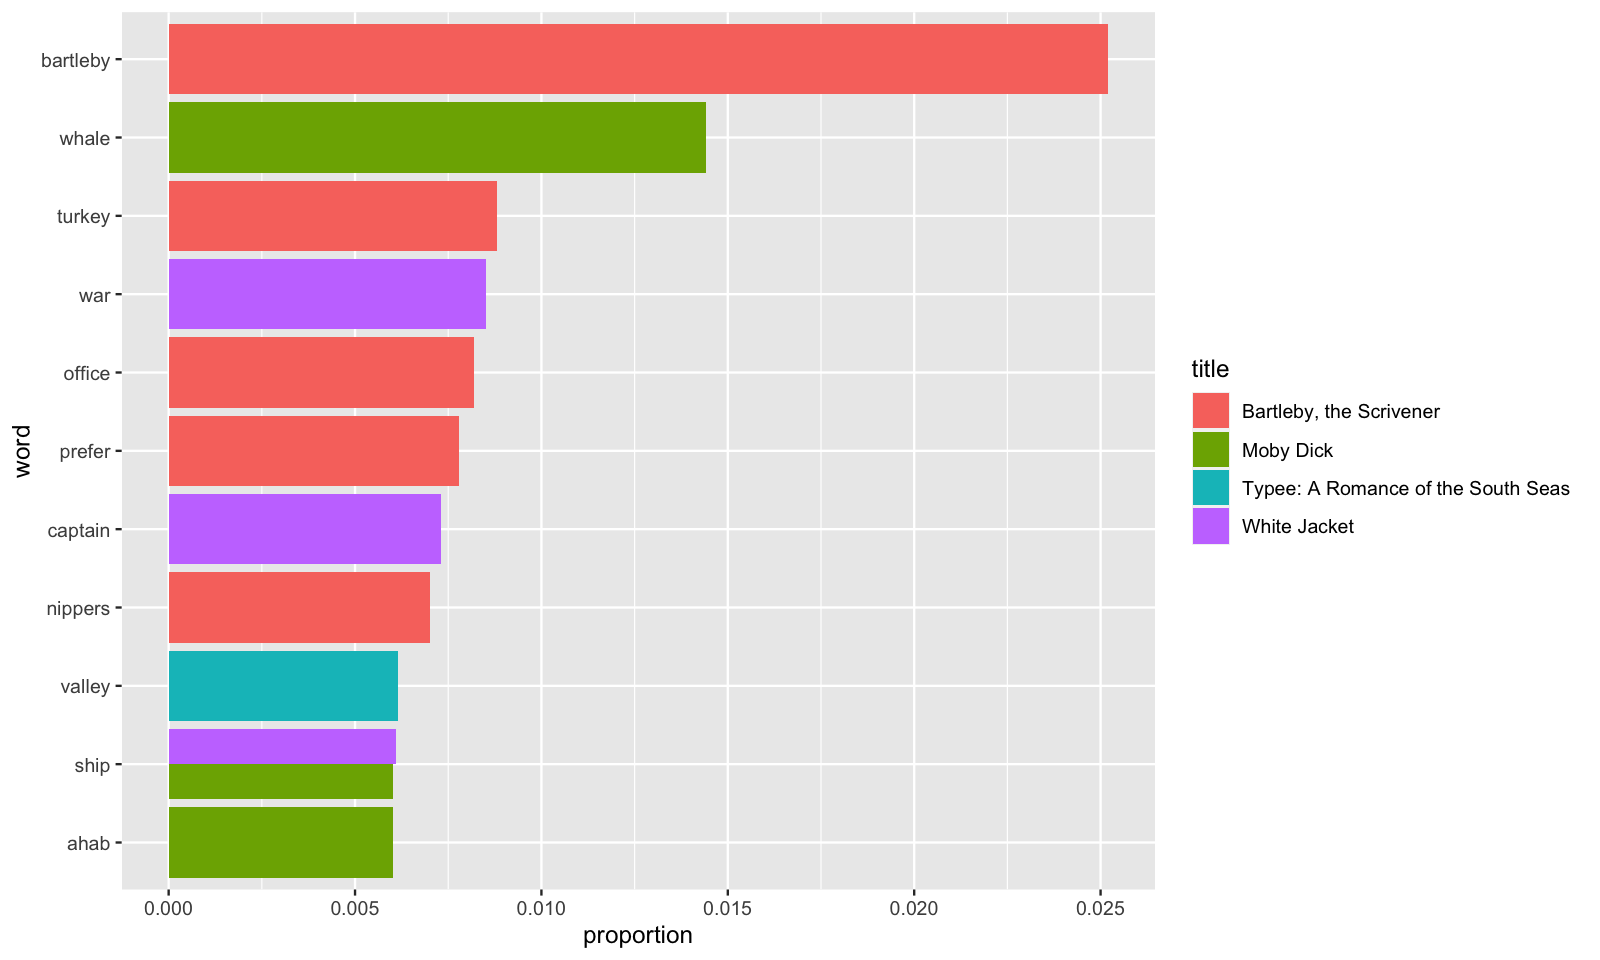

In [24]:
tidy_melville_with_proportion %>%
  filter(proportion > 0.006) %>%
  mutate(word = reorder(word, proportion)) %>%
  ggplot() +
  geom_bar(aes(x=proportion, y=word, fill=title), 
           stat="identity", position = "dodge")

Interesting! In terms of proportions, we see that Melville uses the word "bartleby" much more in *Bartleby, the Scrivener* than he does "whale" in *Moby Dick*. Moreover, Moby Dick no longer dominates 
the popular words list. In fact, it turns out that *Bartleby, the Scrivener* contributes the most highest-ranking words from the collection.

__Exercise:__ Can you adjust the bar plot visualization so that it displays more top words?

In [39]:
# Your code goes here!

### 3.3 Just how popular was *Moby Dick*’s vocabulary?

A possible follow-up question is whether the most popular words in *Moby Dick* also saw significant usage across other texts in the collection. That is, for the most popular words that appear in *Moby Dick*, how often do they occur in the other titles in terms of word proportions? This would suggest elements in those texts that are laced with some of the major thematic components in *Moby Dick*.

We first extract the top 10 word proportions from *Moby Dick* to form a "popular words" list.

In [25]:
top_moby <- tidy_melville %>%
  filter(title == "Moby Dick") %>%
  mutate(proportion = n / sum(n)) %>%
  arrange(desc(proportion)) %>%
  slice(1:10) %>%
  select(word)
top_moby

word
<chr>
whale
ahab
ship
sea
ye
head
boat
time
captain


We compute the word proportions with respect to each of the titles and then join the `top_moby` words 
list with `tidy_melville` to extract only the top Moby Dick words from the other three texts.

In [26]:
top_moby_words_other_texts <- tidy_melville %>%
  group_by(title) %>%
  mutate(proportion = n / sum(n)) %>%
  inner_join(top_moby, by="word") %>%
  ungroup()
top_moby_words_other_texts

title,word,n,proportion
<chr>,<chr>,<int>,<dbl>
Moby Dick,whale,1243,0.014414435
Moby Dick,ahab,520,0.006030174
Moby Dick,ship,520,0.006030174
Moby Dick,sea,454,0.005264806
Moby Dick,ye,439,0.005090858
White Jacket,captain,413,0.007316339
Moby Dick,head,348,0.004035578
White Jacket,ship,345,0.006111711
⋮,⋮,⋮,⋮


Now, the plot. Note that the factor in the `y` aesthetic mapping allows us to preserve the order of popular words in `top_moby` so that we can observe an upward trend in the *Moby Dick* bar heights.

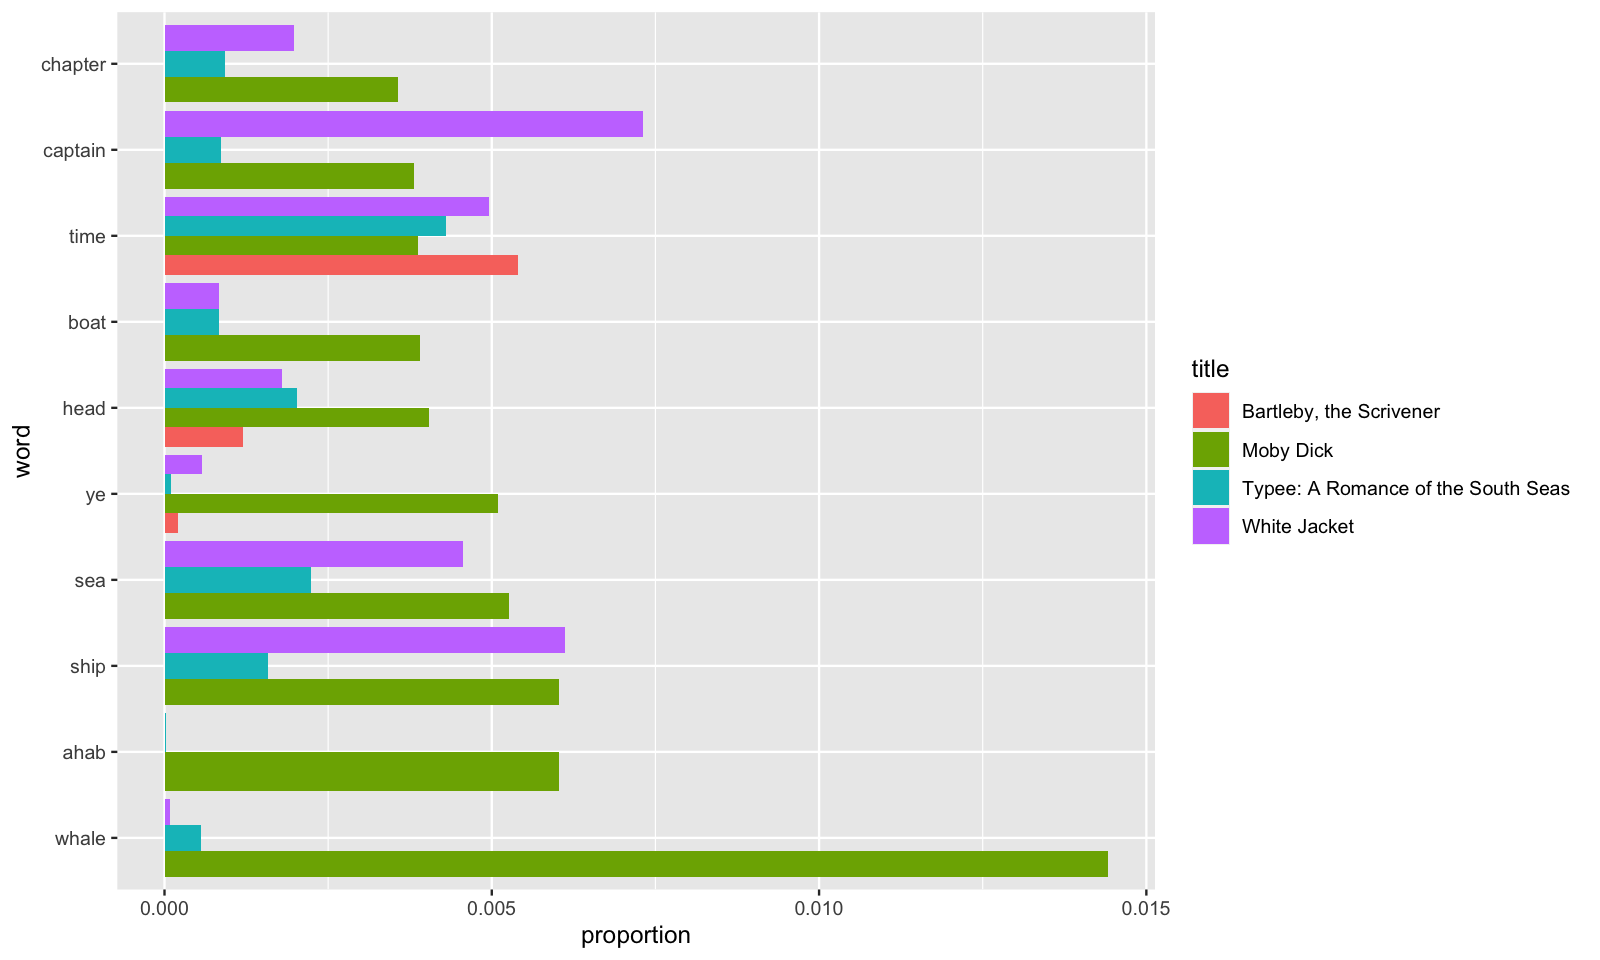

In [27]:
ggplot(top_moby_words_other_texts) + 
  geom_bar(aes(x=proportion, 
               y=factor(word, level=top_moby$word), fill=title), 
           position="dodge",stat="identity") +
  labs(y="word")

## 4. Break

## 5. Sentiment analysis

TBA 

Mining sentiment from text provides a lens for understanding attitudes and opinions
expressed through text. 

when text data is in a tidy data structure, sentiment analysis boils down to just 
an inner join. 